# Diagrama de densidad

El diagrama de densidad nos permitirá conocer los cambios en la densidad, en función de los cambios en la temperatura,salinidad y presión. 
El diagrama se construye a partir de la Ecuación de Estado, para graficar en un rango de valores tanto para Salinidad como Temperatura a una misma presión, se utilizará el modulo GSW (Gibbs Sea Water). Este modulo contiene las sub rutinas TEOS-10 (Thermodynamic Equation Of Seawater 2010) para la evaluación de las propiedades termodinámicas del agua.
Primero se debe incorporar el módulo GSW de python a su entorno de trabajo. Se puede obtener el módulo y una guía en el siguiente link:
https://fischcheng.github.io/2017/02/05/gibbs-seawater-oceanographic-package-for-python/

In [89]:
#Importamos los modulos que requerimos
import matplotlib.pyplot as plt
import numpy as np
import gsw 

Vamos a realizar un gráfico de contornos (i.e. niveles) de densidad para un rango de temperatura desde $10\,^{\circ}{\rm C}$  a  $35\,^{\circ}{\rm C}$, y para un rango de salinidad desde 0 a 36 PSU a una presión en superficie 0 decibares (~0 m).

## Creamos una  matriz de coordenadas ('array') 2 D
Este tipo de matrices contienen pares ordenados de valores representando 2 dimensiones. En el espacio estas dos dimensiones son (x,y); para el presente ejemplo serán la Temperatura y la Salinidad.

In [14]:
S = np.linspace(0,36,50)    #Salinidad
T = np.linspace(5,35,50)    #Temperatura
(X,Y) = np.meshgrid(S,T)    #Array
print (len(S),len(S))       #Print la longitud de cada vector
print (X.shape,Y.shape)     #Print las dimensiones del arreglo


50 50
(50, 50) (50, 50)


Las dimensiones X y Y representan matrices ordenadas de coordenadas. Estas permiten establecer el dominio del diagrama. Luego calculamos la densidad para cada par ordenado.
## Encontramos los valores de densidad para nuestra matriz de coordenadas (T,S)

In [90]:
help(gsw.rho)               #Python permite conocer como deben escribirse los parámetros para una función

Help on function rho in module gsw._wrapped_ufuncs:

rho(SA, CT, p)
    Calculates in-situ density from Absolute Salinity and Conservative
    Temperature, using the computationally-efficient expression for
    specific volume in terms of SA, CT and p  (Roquet et al., 2015).
    
    Parameters
    ----------
    SA : array-like
        Absolute Salinity, g/kg
    CT : array-like
        Conservative Temperature (ITS-90), degrees C
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    
    Returns
    -------
    rho : array-like, kg/m
        in-situ density



In [91]:
do = gsw.rho(X, Y,0)        #la función requiere (Salinidad, Temperatura, Presión)
do.shape                    #verificamos las dimensiones de la matriz de densidades

(50, 50)

Esta línea permite calcular la densidad (rho), para cada par ordenado de Temperatura y Salinidad.
**"do"** representa una matriz de 2 dimensiones.

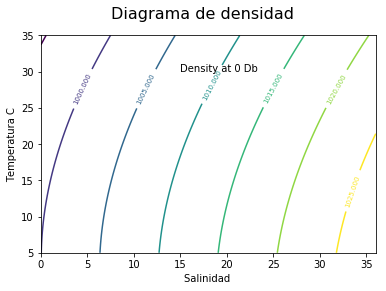

In [92]:
#Gráfico de contornos
c = plt.contour(X,Y,do)
lx = plt.xlabel("Salinidad ")
ly = plt.ylabel("Temperatura C")
plt.suptitle('Diagrama de densidad', fontsize=16)
plt.text(15,30,'Density at 0 Db')
plt.clabel(c,inline=1, fontsize=7)
plt.show()

Ahora encontraremos una matriz de densidad para los mismos valores de T,S pero a una profundidad de 100 bar(i.e. 1000 db~1000 m). Se pueden comparar las anomalías de densidad entre estas dos profundidades.

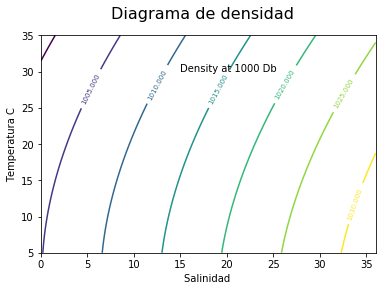

In [93]:
do2 = gsw.rho(X, Y,1000)  
c = plt.contour(X,Y,do2)
lx = plt.xlabel("Salinidad ")
ly = plt.ylabel("Temperatura C")
plt.suptitle('Diagrama de densidad', fontsize=16)
plt.text(15,30,'Density at 1000 Db')
plt.clabel(c,inline=1, fontsize=7)
plt.show()

**TAREA 1:** Grafique la diferencia de densidad entre estos dos niveles de presión, para los valores de temperatura y salinidad dados.

**TAREA 2** 
Encuentre los valores de temperatura y salinidad, para los cuales la densidad es mayor $1031 Kg/m^{3}$ en un nivel de presión de ~1000 metros. Grafique su resultado